In [1]:
import cv2
import dlib

print(cv2.__version__)
print(dlib.__version__)

4.5.3
19.22.1


In [2]:
# 필요한 패키지 import 하기
import os # 환경 변수나 디렉터리, 파일 등의 OS 자원을 제어할 수 있게 해주는 모듈
import cv2 # OpenCV라이브러리 → 컴퓨터 비전 관련 프로그래밍을 쉽게 할 수 있도록 도와주는 라이브러리
import matplotlib.pyplot as plt # 다양한 데이터를 많은 방법으로 도식화 할 수 있도록 하는 라이브러리
import numpy as np # 다차원 배열을 쉽게 처리하고 효율적으로 사용할 수 있도록 하는 라이브러리
import dlib # 이미지 처리 및 기계 학습, 얼굴인식 등을 할 수 있는 c++ 로 개발된 고성능의 라이브러리 

Step 1. 스티커 구하기 or 만들기
스티커를 만들거나 구해야합니다. PPT, 포토샵 등을 이용해서 직접 만드셔도 좋습니다. 보다 간단한 방법은 픽토그램 아이콘을 이용하면 쉽게 만들 수 있습니다.

고양이는 사랑스럽기 때문에 고양이 수염 스티커를 붙여보겠습니다.

In [3]:
%pwd

'/aiffel/aiffel/Online_fund'

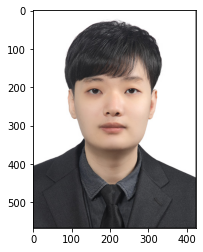

In [4]:
my_image_path = '/aiffel/aiffel/face_embedding/my photo/박준혁1.jpg' # 본인 이미지가 있는 경로를 가지고 온다.
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러옵니다
# plt.imshow 이전에 RGB 이미지로 바꾸는 것을 잊지마세요. 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb) # 이미지 실제 출력하기 위해 이미지를 올려줌 (원하는 사이즈의 픽셀을 원하는 색으로 채워서 만든 그림이라고 합니다.)
plt.show() # 이미지 실제 출력
img_bgr_rot = img_rgb.copy() # 회전 작업용 변수
img_dark = img_rgb.copy() # 어두운 사진 용 변수
img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관합니다
img_show1 = img_bgr.copy()      # 출력용 이미지를 따로 보관합니다

In [5]:
# detector를 선언합니다
detector_hog = dlib.get_frontal_face_detector() # 기본 얼굴 감지기를 반환
print("🌫🛸")

🌫🛸


In [6]:
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid) # 1은 사람수같다.
print("🌫🛸")

🌫🛸


rectangles[[(92, 142) (315, 365)]]


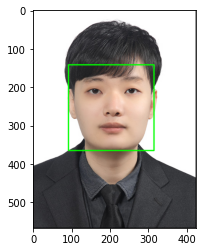

In [7]:
# 찾은 얼굴 영역 박스 리스트
# 여러 얼굴이 있을 수 있습니다
print(dlib_rects)   

for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)

In [8]:
model_path = '/aiffel/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
    # 저장한 landmark 모델의 주소를 model_path 변수에 저장
landmark_predictor = dlib.shape_predictor(model_path)
    # dlib 라이브러리의 shape_predictor 함수를 이용하여 모델을 불러옴
    # landmark_predictor는 RGB이미지와 dlib.rectangle를 입력 받고 dlib.full_object_detection를 반환
    # dlib.rectangle: 내부를 예측하는 박스
    # dlib.full_object_detection: 각 구성 요소의 위치와, 이미지 상의 객체의 위치를 나타냄
print("🌫🛸")

🌫🛸


In [9]:
list_landmarks = []
    # 랜드마크의 위치를 저장할 list 생성    

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
# face landmark 좌표를 저장해둡니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
        # 모든 landmark의 위치정보를 points 변수에 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        # 각각의 landmark 위치정보를 (x,y) 형태로 변환하여 list_points 리스트로 저장
    list_landmarks.append(list_points)
        # list_landmarks에 랜드마크 리스트를 저장

print(len(list_landmarks[0]))
    # 얼굴이 n개인 경우 list_landmarks는 n개의 원소를 갖고
    # 각 원소는 68개의 랜드마크 위치가 나열된 list 
    # list_landmarks의 원소가 1개이므로 list_landmarks[1]을 호출하면 IndexError가 발생

68


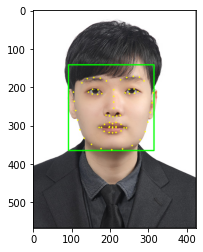

In [10]:
# list_landmarks의 원소가 1개이므로 아래 반복문은 한번만 실행됨
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)
            # cv2.circle: OpenCV의 원을 그리는 함수
            # img_show 이미지 위 각각의 point에
            # 크기가 2이고 (0, 255, 255)색으로 내부가 채워진(-1) 원을 그림
            # (마지막 인수가 자연수라면 그만큼의 두께의 선으로 원이 그려짐)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
    # RGB 이미지로 전환
plt.imshow(img_show_rgb)
    # 이미지를 준비
plt.show()
    # 이미지를 출력

In [11]:
list_landmarks

[[(105, 213),
  (107, 237),
  (111, 261),
  (116, 286),
  (122, 311),
  (133, 333),
  (152, 349),
  (177, 360),
  (205, 363),
  (233, 361),
  (258, 352),
  (279, 337),
  (292, 316),
  (299, 291),
  (305, 266),
  (310, 241),
  (313, 215),
  (127, 189),
  (141, 178),
  (158, 175),
  (175, 177),
  (191, 184),
  (228, 181),
  (244, 175),
  (261, 172),
  (277, 174),
  (289, 184),
  (210, 207),
  (210, 224),
  (210, 239),
  (210, 255),
  (190, 273),
  (199, 275),
  (208, 277),
  (218, 275),
  (227, 274),
  (144, 213),
  (155, 206),
  (169, 207),
  (179, 217),
  (168, 219),
  (154, 218),
  (240, 215),
  (250, 206),
  (263, 205),
  (273, 212),
  (264, 216),
  (251, 217),
  (172, 305),
  (186, 297),
  (199, 292),
  (207, 295),
  (216, 292),
  (229, 297),
  (243, 306),
  (229, 314),
  (216, 318),
  (207, 319),
  (198, 318),
  (185, 315),
  (178, 305),
  (199, 303),
  (207, 304),
  (216, 303),
  (237, 306),
  (216, 305),
  (207, 306),
  (198, 305)]]

In [12]:
# zip() : 두 그룹의 데이터를 서로 엮어주는 파이썬의 내장 함수
# dlib_rects와 list_landmarks 데이터를 엮어 주었음
# dlib_rects : 얼굴 영역을 저장하고 있는 값
# → rectangles[[(345, 98) (531, 284)]]
# list_landmarks : 68개의 랜드마크 값 저장(이목구비 위치(x,y))
#[[(105, 213),(107, 237),(111, 261), (116, 286), (122, 311),  (133, 333),  (152, 349),  (177, 360),(205, 363),  (233, 361),  (258, 352),  (279, 337),  (292, 316),  (299, 291),  (305, 266),(310, 241),  (313, 215),  (127, 189),  (141, 178),  (158, 175),  (175, 177),  (191, 184),  (228, 181),  (244, 175),  (261, 172),  (277, 174),  (289, 184),  (210, 207),  (210, 224),  (210, 239),  (210, 255),  (190, 273),  (199, 275),  (208, 277),  (218, 275),  (227, 274),  (144, 213),  (155, 206),  (169, 207),  (179, 217),  (168, 219),  (154, 218),  (240, 215),  (250, 206),  (263, 205),  (273, 212),  (264, 216),  (251, 217),  (172, 305),  (186, 297),  (199, 292),  (207, 295),  (216, 292),  (229, 297),  (243, 306),  (229, 314),  (216, 318),  (207, 319),  (198, 318),  (185, 315),  (178, 305),  (199, 303),  (207, 304),  (216, 303),  (237, 306),  (216, 305),  (207, 306),  (198, 305)]]
for dlib_rect, landmark in zip(dlib_rects, list_landmarks): # 얼굴 영역을 저장하고 있는 값과 68개의 랜드마크를 저장하고 있는 값으로 반복문 실행
    print (landmark[30]) # 코의 index는 30 입니다
    x = landmark[30][0] # 이미지에서 코 부위의 x값
    y = landmark[30][1] - dlib_rect.height()//2 # 이미지에서 코 부위의 y값 - 얼굴 영역의 세로를 차지하는 픽셀의 수//2 → (437, 182-(186+1//2))
    w = h = dlib_rect.width() # 얼굴 영역의 가로를 차지하는 픽셀의 수 (531-345+1) → max(x) - min(x) +1(픽셀의 수 이기 때문에 1을 더해줌 → 픽셀 수는 점 하나로도 1이 됨)
    print (f'(x,y) : ({x},{y})')
    print (f'(w,h) : ({w},{h})')

(210, 255)
(x,y) : (210,143)
(w,h) : (224,224)


제 얼굴 이미지에서는 코의 중심점이 (210, 255) 로 나오네요.

준비해 둔 스티커 이미지를 읽어서 적용해 보겠습니다.

In [13]:
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/24674.png' # 고양이수염 이미지의 경로
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다 // cv2.imread(이미지 경로) → image객체 행렬을 반환
img_sticker = cv2.resize(img_sticker, (w,h)) # 스티커 이미지 조정 → w,h는 얼굴 영역의 가로를 차지하는 픽셀의 수(187) // cv2.resize(image객체 행렬, (가로 길이, 세로 길이))
print (img_sticker.shape) # 사이즈를 조정한 왕관 이미지의 차원 확인

(224, 224, 3)


In [14]:
# x,y,w,h 모두 위에서 반복문 안에서 지정해준 값임
# x는 이미지에서 코 부위의 x값 = 210
# y는 이미지에서 코 부위의 y값 = 143
# w는 얼굴 영역의 가로를 차지하는 픽셀의 수 = 224
# h는 얼굴 영역의 가로를 차지하는 픽셀의 수 = 224
refined_x = x - w // 2 # 210 - (224//2) = 210-143 = 98
refined_y = 143   # y - h # 143-224 = -81
# 원본 이미지에 스티커 이미지를 추가하기 위해서 x, y 좌표를 조정합니다. 이미지 시작점은 top-left 좌표이기 때문입니다.
# 즉, refined_x, refined_y값에서 왕관 이미지가 시작됨
print (f'(x,y) : ({refined_x},{refined_y})') # 음수 발생 : 이미지 범위를 벗어남
# 우리는 현재 이마 자리에 왕관을 두고 싶은건데, 이마위치 - 왕관 높이를 했더니 이미지의 범위를 초과하여 음수가 나오는 것
# opencv는 ndarray데이터를 사용하는데, ndarray는 음수인덱스에 접근 불가하므로 스티커 이미지를 잘라 줘야 한다.

(x,y) : (98,143)


In [15]:
# # 왕관 이미지가 이미지 밖에서 시작하지 않도록 조정이 필요함
# # 좌표 순서가 y,x임에 유의한다. (y,x,rgb channel)
# # 현재 상황에서는 -y 크기만큼 스티커를 crop 하고, top 의 x좌표와 y 좌표를 각각의 경우에 맞춰 원본 이미지의 경계 값으로 수정하면 아래와 같은 형식으로 나옵니다.
# # 음수값 만큼 왕관 이미지(혹은 추후 적용할 스티커 이미지)를 자른다.
# if refined_x < 0: 
#     img_sticker = img_sticker[:, -refined_x:]
#     refined_x = 0
# # 왕관 이미지를 씌우기 위해 왕관 이미지가 시작할 y좌표 값 조정
# if refined_y < 0:
#     img_sticker = img_sticker[-refined_y:, :] # refined_y가 -98이므로, img_sticker[98: , :]가 된다. (187, 187, 3)에서 (89, 187, 3)이 됨 (187개 중에서 98개가 잘려나감)
#     refined_y = 0

# print (f'(x,y) : ({refined_x},{refined_y})')

In [16]:
# # sticker_area는 원본이미지에서 스티커를 적용할 위치를 crop한 이미지 입니다.
# # 예제에서는 (344,0) 부터 (344+187, 0+89) 범위의 이미지를 의미합니다.
# # 좌표 순서가 y,x임에 유의한다. (y,x,rgb channel)
# # img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
# # img_show[0:0+89, 344:344+187]
# # img_show[0:89, 344:531]
# # 즉, x좌표는 344~531 / y좌표는 0~89가 됨
# sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
# # 왕관 이미지에서 사용할 부분은 0이 아닌 색이 있는 부분을 사용합니다.
# # 왕관 이미지에서 0이 나오는 부분은 흰색이라는 뜻, 즉 이미지가 없다는 소리임.
# # 현재 왕관 이미지에서는 왕관과 받침대 밑의 ------ 부분이 됨
# # 그렇기 때문에 0인 부분(이미지가 없는 부분)은 제외하고 적용
# # sticker_area는 원본 이미지에서 스티커를 적용할 위치를 미리 잘라낸 이미지입니다.
# # 즉, 왕관 이미지에서 왕관 이미지가 없는 부분(왕관과 받침대 밑의 ------ 부분)은 원본 이미지에서 미리 잘라놓은 sticker_area(스티커 적용할 부분 만큼 원본 이미지에서 자른 이미지)를 적용하고,
# # 나머지 부분은 스티커로 채워주면 됨
# # np.where는 조건에 해당하는 인덱스만 찾아서 값을 적용하는 방법이다.
# # 아래 코드에서는 img_sticker가 0일 경우(왕관 이미지에서 왕관 부분 제외한 나머지 이미지)에는 sticker_area(원본 이미지에서 스티커를 적용할 위치를 미리 잘라낸 이미지)를 적용하고,
# # 나머지 부분은 img_sticker(왕관 이미지)를 적용한다.
# img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
#     np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)
# print("슝~")

In [17]:
# 길어서 복잡해 보이지만 img_show[from:to] 형식
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
np.where(img_sticker==0,img_sticker, sticker_area).astype(np.uint8)

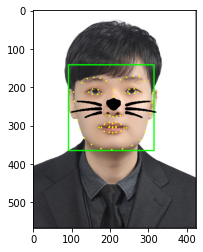

In [18]:
# 고양이 이미지를 적용한 이미지를 보여준다.
# 얼굴 영역(7-3)과 랜드마크(7-4)를 미리 적용해놓은 img_show에 왕관 이미지를 덧붙인 이미지가 나오게 된다.)
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

짠~ 스티커 기본 기능이 완성 되었습니다.

bounding box와 landmark를 제거하고 최종 결과만 출력해 봅시다. img_show 대신, 지금까지 아껴 두었던 img_bgr을 활용할 것입니다.

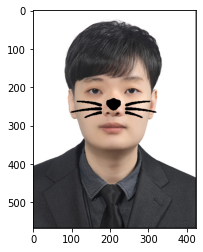

In [19]:
#바운딩 박스 및 랜드마크 제거
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
np.where(img_sticker==0,img_sticker, sticker_area).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

여러분이 사용하고 있는 어플의 초기 버전을 완성했습니다.

(212.5, 283.5)
<Face detection bounding box>


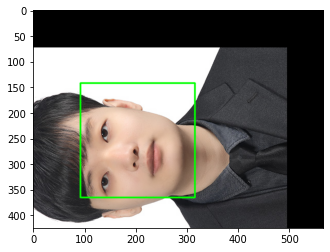

<Landmark result : Fail>


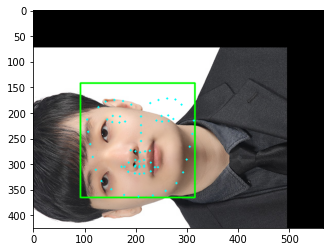

<Attatch sticker : Fail>


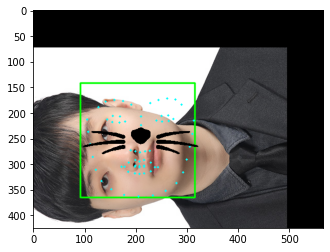

In [20]:
#새 이미지 기져오기 - 이미 RGB 변환 되어있는 이미지 
plt.imshow(img_bgr_rot)
plt.show

#이미지 회전시키기
width, height = img_bgr_rot.shape[:2] #(1080, 1080)
cp = (img_bgr_rot.shape[1] / 2, img_bgr_rot.shape[0] / 2) #회전 중심축 좌표 설정
print(cp)

img_rot = cv2.getRotationMatrix2D(cp, 90, 1) 
img_rot_dst = cv2.warpAffine(img_bgr_rot,img_rot,(width,height))


# plt.imshow(img_rot_dst)
# plt.show


#회전 이미지의 bounding box 확인
for dlib_rect in dlib_rects: 
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_rot_dst, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

print("<Face detection bounding box>")
plt.imshow(img_rot_dst)
plt.show()

#회전 이미지의 랜드마크 확인

list_landmarks_rot = []

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    # face landmark 좌표를 저장해둡니다
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks_rot.append(list_points)

# print(len(list_landmarks_rot[0]))
# print(list_landmarks_rot)

# 찾은 랜드마크 영상에 출력하기
for landmark in list_landmarks_rot:
    for point in landmark:
        cv2.circle(img_rot_dst, point, 2, (0, 255, 255), -1)
print("<Landmark result : Fail>")
plt.imshow(img_rot_dst)
plt.show()


#회전된 이미지에 스티커 삽입

sticker_area = img_rot_dst[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_rot_dst[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
np.where(img_sticker==0,img_sticker, sticker_area).astype(np.uint8)
(print("<Attatch sticker : Fail>"))
plt.imshow(img_rot_dst)
plt.show()

랜드마크가 제대로 검출되지 않는 모습을 보인다.

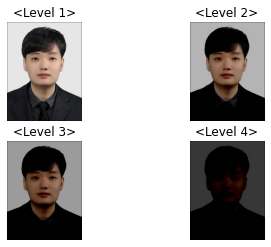

In [21]:
#어두운 사진불러오기
img_drk_1 = np.ones(img_dark.shape, dtype = "uint8") * 25
img_drk_2 = np.ones(img_dark.shape, dtype = "uint8") * 75
img_drk_3 = np.ones(img_dark.shape, dtype = "uint8") * 100
img_drk_4 = np.ones(img_dark.shape, dtype = "uint8") * 200

sub_1 = cv2.subtract(img_dark,img_drk_1)
sub_2 = cv2.subtract(img_dark,img_drk_2)
sub_3 = cv2.subtract(img_dark,img_drk_3)
sub_4 = cv2.subtract(img_dark,img_drk_4)
sub_5 = sub_4.copy()

sub = [sub_1,sub_2,sub_3,sub_4]
sub_output = [sub_1,sub_2,sub_3,sub_4]

# plt.imshow(sub_1)
# plt.show()

for i in range(1,5):
    sub_image = sub[i-1]
    plt.subplot(2,2,i)
    plt.axis("off")
    plt.title(f"<Level {i}>")
    plt.imshow(sub_image)
    
# plt.subplot(1,4,1) #sublplot 모양 1x4 형태로 나열
# plt.axis('off') # 축없애기
# plt.imshow(sub_1) #이미지 산출

<Sticker result Level 1>


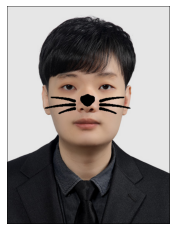

<Sticker result Level 2>


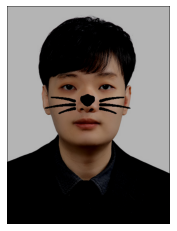

<Sticker result Level 3>


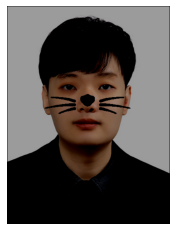

<Sticker result Level 4>


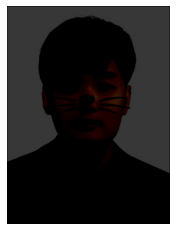

In [22]:
for i in range(4):
    sticker_area = sub[i][refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
    sub[i][refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,img_sticker, sticker_area).astype(np.uint8)
    # 원본이미지img_show의 [] 내부에 해당하는 부분은 새로운 값을 재위치키라는 뜻
    print(f"<Sticker result Level {i+1}>")
    plt.axis("off")
    plt.imshow(sub[i])
    plt.show()

어두운사진으로 만들어서 정확하게 나온것같다. 아예 처음부터 어둡게 찍어야겠다.

🌫🛸
rectangles[[(92, 142) (315, 365)]]


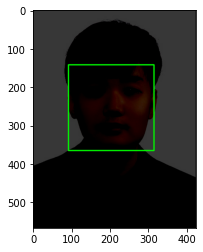

In [23]:
dlib_rects2 = detector_hog(sub_5, 1)   # (image, num of image pyramid) # 1은 사람수같다.
print("🌫🛸")
# 찾은 얼굴 영역 박스 리스트
# 여러 얼굴이 있을 수 있습니다
print(dlib_rects2)   

for dlib_rect1 in dlib_rects2: # 찾은 얼굴 영역의 좌표
    l = dlib_rect1.left() # 왼쪽
    t = dlib_rect1.top() # 위쪽
    r = dlib_rect1.right() # 오른쪽
    b = dlib_rect1.bottom() # 아래쪽

    cv2.rectangle(sub_5, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림

img_show_rgb1 =  cv2.cvtColor(sub_5,0)
plt.imshow(img_show_rgb1)

제대로 나왔다. 성능이 뛰어난가보다.

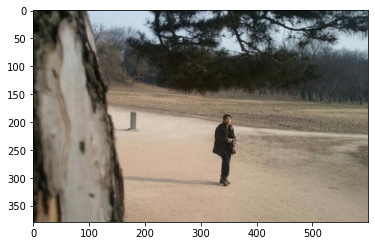

In [24]:
my_image_path1 = '/aiffel/aiffel/face_embedding/my photo/Ah-19ihCIAA0V06.jpg' # 본인 이미지가 있는 경로를 가지고 온다.
img_bgr1 = cv2.imread(my_image_path1)    # OpenCV로 이미지를 불러옵니다
# plt.imshow 이전에 RGB 이미지로 바꾸는 것을 잊지마세요. 
img_rgb1 = cv2.cvtColor(img_bgr1, cv2.COLOR_BGR2RGB)
img_rgb2 = img_rgb1.copy()
plt.imshow(img_rgb1) # 이미지 실제 출력하기 위해 이미지를 올려줌 (원하는 사이즈의 픽셀을 원하는 색으로 채워서 만든 그림이라고 합니다.)
plt.show() # 이미지 실제 출력

🌫🛸
rectangles[]


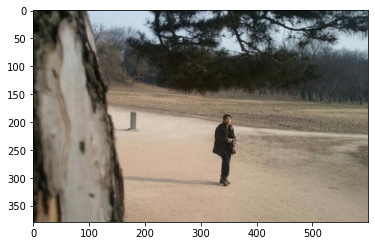

In [25]:
dlib_rects3 = detector_hog(img_rgb2, 1)   # (image, num of image pyramid) # 1은 사람수같다.
print("🌫🛸")
# 찾은 얼굴 영역 박스 리스트
# 여러 얼굴이 있을 수 있습니다
print(dlib_rects3)   

for dlib_rect2 in dlib_rects3: # 찾은 얼굴 영역의 좌표
    l = dlib_rect2.left() # 왼쪽
    t = dlib_rect2.top() # 위쪽
    r = dlib_rect2.right() # 오른쪽
    b = dlib_rect2.bottom() # 아래쪽

    cv2.rectangle(img_rgb2, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림

img_show_rgb2 =  cv2.cvtColor(img_rgb2,0)
plt.imshow(img_show_rgb2)

멀리있는사진은 안나왔다.

혹시나해서 디텍팅 다시 돌려보았다.

🌫🛸
rectangles[[(92, 142) (315, 365)]]


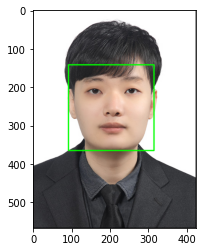

In [26]:
dlib_rects4 = detector_hog(img_show1, 1)   # (image, num of image pyramid) # 1은 사람수같다.
print("🌫🛸")
# 찾은 얼굴 영역 박스 리스트
# 여러 얼굴이 있을 수 있습니다
print(dlib_rects4)   

for dlib_rect3 in dlib_rects4: # 찾은 얼굴 영역의 좌표
    l = dlib_rect3.left() # 왼쪽
    t = dlib_rect3.top() # 위쪽
    r = dlib_rect3.right() # 오른쪽
    b = dlib_rect3.bottom() # 아래쪽

    cv2.rectangle(img_show1, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림

img_show_rgb3 =  cv2.cvtColor(img_show1, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb3)

제대로 나왔다.

# 회고
 * 다행히 주석이 많아서 좀더 코드를 찬찬히 보면서 하기 좋았다.
 
 회전하는 코드, 밝기를 조정하는 코드, 등을 알게되었고, 아주 멀리있는 사람은 인식이 안된다는걸 알게 되었다.
 
 코드를 가져와서, 이해하는데 시간을 더 많이 쓴것 같았다.
 
 이중 제일 중요한 코드는 
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
np.where(img_sticker==0,img_sticker, sticker_area).astype(np.uint8)

인것같았다. 길어서 복잡해보여서 이해가 현저히 어려웠다.

배운것은 역시 정면은 짱이다. 측면사진을 찍으신 분을 보니, 그것도 반응하는것 같았다. 90도로 눕혀보니, 랜드마크검출이 잘되지 않았다.

스노우 같은 앱에서도 누운것은 잘 인식이 안되는걸 이제야 깨달았다. 

좀더 공부해서 좀더 이해 하고싶다.